In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

Data Generation
===

In [2]:
np.random.seed(10)
p, q = (np.random.rand(i, 2) for i in (4, 5))
p_big, q_big = (np.random.rand(i, 80) for i in (100, 120))

print(p, "\n\n", q)

[[0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]] 

 [[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]]


Solution
===

In [50]:
def naive(p, q):
    ''' 
    Brute force calculation D where element D_ij is the Euclidean distance between i th point in p and j th point in q 
    Return:
        D
    '''
    p_size, q_size, dim = p.shape[0], q.shape[0], p.shape[1]
    assert p.shape[1] == q.shape[1]
    D = np.zeros((p_size, q_size))
    for i in range(p_size):
        for j in range(q_size):
            dist = 0
            for k in range(dim):
                dist += (p[i][k]- q[j][k])**2
            dist = np.sqrt(dist)
            D[i][j] = dist
    return D

naive(p,q) 
            

array([[0.60599073, 0.93659449, 0.91124856, 0.59321356, 0.27561751],
       [0.80746999, 0.21102354, 0.67268649, 0.22495084, 0.46534491],
       [0.35654215, 0.75217493, 0.57200052, 0.49900068, 0.23310825],
       [0.67281411, 0.52407472, 0.31520226, 0.63212897, 0.70277376]])

### Use matching indices

Instead of iterating through indices, one can use them directly to parallelize the operations with Numpy.

In [4]:
rows, cols = np.indices((p.shape[0], q.shape[0]))
print(rows, end='\n\n')
print(cols)

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


In [55]:
np.indices?

Signature: np.indices(dimensions, dtype=<class 'int'>, sparse=False)
Docstring:
Return an array representing the indices of a grid.

Compute an array where the subarrays contain index values 0, 1, ...
varying only along the corresponding axis.

Parameters
----------
dimensions : sequence of ints
    The shape of the grid.
dtype : dtype, optional
    Data type of the result.
sparse : boolean, optional
    Return a sparse representation of the grid instead of a dense
    representation. Default is False.

    .. versionadded:: 1.17

Returns
-------
grid : one ndarray or tuple of ndarrays
    If sparse is False:
        Returns one array of grid indices,
        ``grid.shape = (len(dimensions),) + tuple(dimensions)``.
    If sparse is True:
        Returns a tuple of arrays, with
        ``grid[i].shape = (1, ..., 1, dimensions[i], 1, ..., 1)`` with
        dimensions[i] in the ith place

See Also
--------
mgrid, ogrid, meshgrid

Notes
-----
The output shape in the dense case is obtained 

In [13]:
print(p[rows.ravel()], end='\n\n')
print(q[cols.ravel()])
len(q[rows.ravel()])

[[0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]]

[[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607

20

In [40]:
def with_indices(p, q):
    ''' parallelization with indices
    '''
    rows, cols = np.indices((p.shape[0], q.shape[0]))
    return np.sqrt(np.sum((p[rows.ravel()] - q[cols.ravel()])**2, axis=1)).reshape((p.shape[0], q.shape[0]))
with_indices(p,q)

array([[0.60599073, 0.93659449, 0.91124856, 0.59321356, 0.27561751],
       [0.80746999, 0.21102354, 0.67268649, 0.22495084, 0.46534491],
       [0.35654215, 0.75217493, 0.57200052, 0.49900068, 0.23310825],
       [0.67281411, 0.52407472, 0.31520226, 0.63212897, 0.70277376]])

### Use a library

`scipy` is the equivalent of matlab toolboxes and have a lot to offer. Actually the pairwise computation is part of the library through the `spatial` module.

In [54]:
from scipy.spatial.distance import cdist

def scipy_version(p, q):
    return cdist(p, q)



### Numpy Magic

In [7]:
def tensor_broadcasting(p, q):
    return np.sqrt(np.sum((p[:,np.newaxis,:]-q[np.newaxis,:,:])**2, axis=2))

# Compare methods

In [52]:
methods = [naive, with_indices, scipy_version, tensor_broadcasting]
timers = []
for f in methods:
    r = %timeit -o f(p_big, q_big)
    timers.append(r)

1.16 s ± 294 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
7.08 ms ± 442 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
454 µs ± 131 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.52 ms ± 417 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


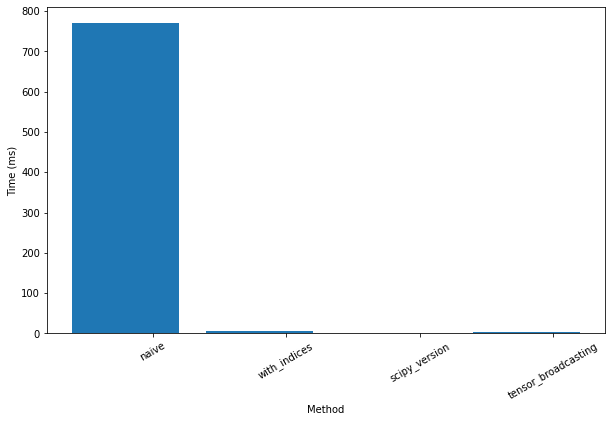

In [53]:
plt.figure(figsize=(10,6))
plt.bar(np.arange(len(methods)), [r.best*1000 for r in timers], log=False)  # Set log to True for logarithmic scale
plt.xticks(np.arange(len(methods))+0.2, [f.__name__ for f in methods], rotation=30)
plt.xlabel('Method')
plt.ylabel('Time (ms)')
plt.show()